In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
df_bli = pd.read_csv('./datasets/oecd_bli_2015.csv', thousands=',')
df_bli.columns.values[0] = 'LOCATION'
df_bli = df_bli.loc[(df_bli['Indicator'] == 'Life satisfaction') & (df_bli['Inequality'] == 'Total'), :]
df_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2669,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2670,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2671,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2672,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2673,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN


In [17]:
df_capita = pd.read_csv('./datasets/gdp_per_capita.csv', delimiter="\t", encoding='latin-1', thousands=',', na_values='n/a')
df_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [18]:
country_stats = df_bli.merge(df_capita, how='inner', on='Country')[['Country', '2015', 'Value']]
country_stats.columns = ['Country', 'GDP per capita (USD)', 'Life satisfaction']
country_stats['GDP per capita (USD)'] = country_stats['GDP per capita (USD)'].apply(lambda x: int(round(x)))
country_stats.head()

,Country,GDP per capita (USD),Life satisfaction
0,Australia,50962,7.3
1,Austria,43724,6.9
2,Belgium,40107,6.9
3,Canada,43332,7.3
4,Czech Republic,17257,6.5


In [19]:
print(country_stats)

            Country  GDP per capita (USD)  Life satisfaction
0         Australia                 50962                7.3
1           Austria                 43724                6.9
2           Belgium                 40107                6.9
3            Canada                 43332                7.3
4    Czech Republic                 17257                6.5
5           Denmark                 52114                7.5
6           Finland                 41974                7.4
7            France                 37675                6.5
8           Germany                 40997                7.0
9            Greece                 18064                4.8
10          Hungary                 12240                4.9
11          Iceland                 50855                7.5
12          Ireland                 51351                7.0
13            Italy                 29867                6.0
14            Japan                 32486                5.9
15            Korea     

In [20]:
# Prepare the data
X = np.c_[country_stats['GDP per capita (USD)']]
y = np.c_[country_stats['Life satisfaction']]

<AxesSubplot:xlabel='GDP per capita (USD)', ylabel='Life satisfaction'>

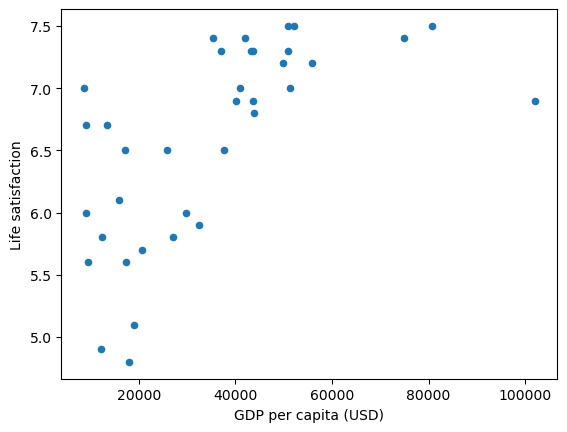

In [21]:
# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction')
plt.show()

# Model based learning using linear regression

In [30]:
import sklearn.linear_model

# select a linear model
model = sklearn.linear_model.LinearRegression()

# train the model
model.fit(X, y)

# # make a prediction
X_new = [[22587]]
model.predict(X_new)

LinearRegression()

array([[6.28653576]])

In [23]:
model.coef_
model.intercept_

array([[2.31773515e-05]])

array([5.76302892])

# Instance based learning using K nearest neighbors

In [31]:
import sklearn.neighbors

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

model.fit(X, y)

# # make a prediction
X_new = [[22587]]
model.predict(X_new)

KNeighborsRegressor(n_neighbors=3)

array([[5.76666667]])

# Model based learning using linear regression and lasso regularization

In [32]:
import sklearn.linear_model

# lasso regularization
reg = sklearn.linear_model.Lasso(alpha=0.1)


# train the model
reg.fit(X, y)

# # make a prediction
X_new = [[22587]]
reg.predict(X_new)

Lasso(alpha=0.1)

array([6.28653857])

# Model based learning using linear regression and Ridge regularization

In [33]:
import sklearn.linear_model

# lasso regularization
reg = sklearn.linear_model.Ridge(alpha=0.5)


# train the model
reg.fit(X, y)

# # make a prediction
X_new = [[22587]]
reg.predict(X_new)

Ridge(alpha=0.5)

array([[6.28653576]])